1. Загрузите набор данных и изучите его: объем выборки, количество столбцов, характеристики столбцов (признаков), имеются ли пропуски, имеются ли выбросы

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Загрузка данных
df = pd.read_csv('laptop_price.csv', encoding='windows-1251')

# Получение информации о наборе данных
info = df.info()
size = df.shape
print(info)
print("Размер набора данных:", size)
print(df.isnull().sum())  # Проверка на пропуски

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB
None
Размер набора данных: (1303, 13)
laptop_ID           0
Company             0
Product             0
TypeName           

In [35]:
df.head(5)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [36]:
print(df.describe())

         laptop_ID       Inches  Price_euros
count  1303.000000  1303.000000  1303.000000
mean    660.155794    15.017191  1123.686992
std     381.172104     1.426304   699.009043
min       1.000000    10.100000   174.000000
25%     331.500000    14.000000   599.000000
50%     659.000000    15.600000   977.000000
75%     990.500000    15.600000  1487.880000
max    1320.000000    18.400000  6099.000000


* Inches: среднее значение 15.0 дюймов, с минимальным 10.1 и максимальным 18.4.
* Price_euros: средняя цена 1123.69 евро, с диапазоном от 174 до 6099 евро.

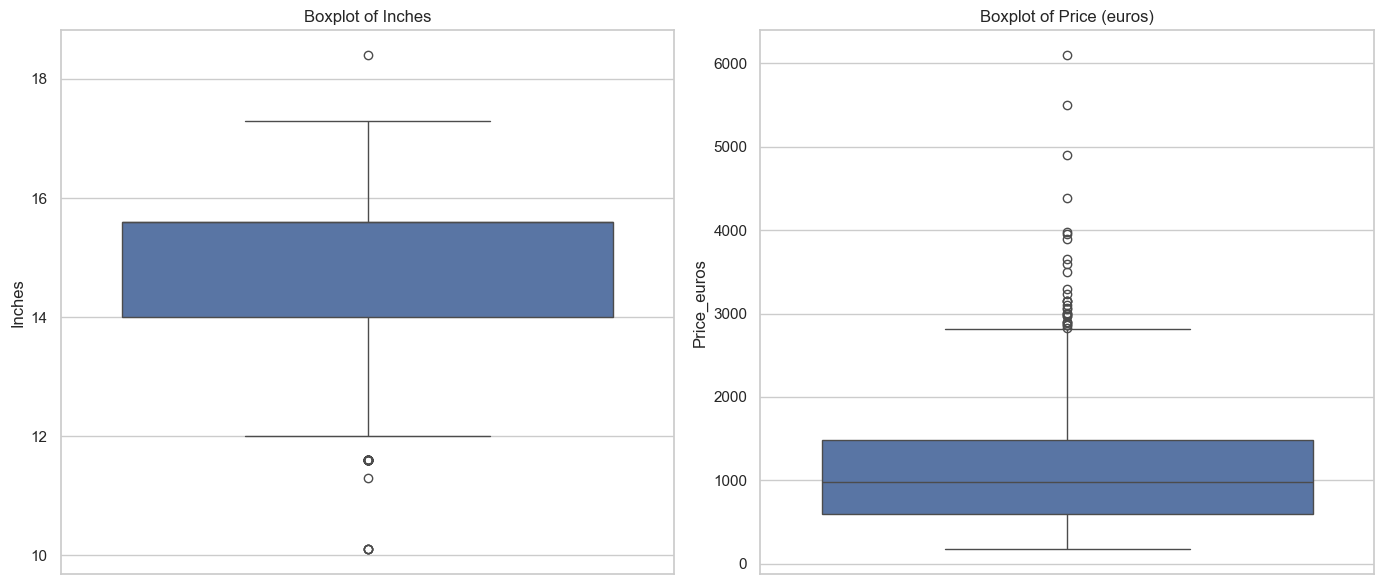

In [37]:
sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, y='Inches')
plt.title('Boxplot of Inches')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, y='Price_euros')
plt.title('Boxplot of Price (euros)')

plt.tight_layout()
plt.show()


* Inches: видны возможные выбросы среди моделей с большим размером экрана, начиная примерно с 17 дюймов.
* Price_euros: также наблюдаются выбросы на высоком уровне цен, в особенности модели стоимостью выше 3000 евро.

2. Подумайте как преобразовать столбцы, чтобы привести все к числовому виду: где стоит категории заменить метками, где преобразовать столбцы. Для этого у всех столбцов типа object посмотрите уникальные значения. 

- столбец 'TypeName' можно удалить, в нем  618 уникальных значений



In [38]:
df.drop(columns=['TypeName'], inplace=True)
df.head(5)

,laptop_ID,Company,Product,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


- для столбцов 'RAM'  и 'Weight'  оставить только цифры - объем памяти  и вес, причем в каждом столбце числа должны советовать одинаковым единицам Gb и kg



In [39]:
# Удаляем текст 'GB' из 'Ram' и 'kg' из 'Weight', затем преобразуем типы
df['Ram'] = df['Ram'].str.replace('GB', '').astype(int)
df['Weight'] = df['Weight'].str.replace('kg', '').astype(float)
df.head(5)

,laptop_ID,Company,Product,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,2,Apple,Macbook Air,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,3,HP,250 G6,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,4,Apple,MacBook Pro,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,5,Apple,MacBook Pro,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60


- столбец Memory стоит преобразовать к нескольким столбцам, соответствующим Memory_SSD, Memory_HDD, Memory_Flash_Storage, Memory_Hybrid все объемы памяти перевести в GB и записать в соответствующие столбцы

In [40]:
import re

def convert_memory_to_gb(memory_str):
    # Проверяем, если 'TB' в строке, конвертируем его в 'GB' эквивалент
    return re.sub(r'(\d+)TB', lambda x: f"{int(x.group(1)) * 1024}GB", memory_str)

# Применяем преобразование ко всем строкам в столбце 'Memory'
df['Memory'] = df['Memory'].apply(convert_memory_to_gb)

df.head(5)

,laptop_ID,Company,Product,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,2,Apple,Macbook Air,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,3,HP,250 G6,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,4,Apple,MacBook Pro,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,5,Apple,MacBook Pro,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60


In [41]:
# Extract memory specifications including SSD, Flash Storage, HDD, and Hybrid
memory_split = df['Memory'].str.extract(r'(?:(\d+)GB\s*SSD|(\d+)GB\s*Flash Storage|(\d+)GB\s*HDD|(\d+)GB\s*Hybrid)')

memory_split = memory_split.fillna(0).astype(int)
df['Memory_SSD'] = memory_split[0]
df['Memory_Flash_Storage'] = memory_split[1]
df['Memory_HDD'] = memory_split[2]
df['Memory_Hybrid'] = memory_split[3]

df.drop(columns=['Memory'], inplace=True)
df.head(5)

,laptop_ID,Company,Product,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Memory_SSD,Memory_Flash_Storage,Memory_HDD,Memory_Hybrid
0,1,Apple,MacBook Pro,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,128,0,0,0
1,2,Apple,Macbook Air,13.3,1440x900,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,898.94,0,128,0,0
2,3,HP,250 G6,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,No OS,1.86,575.00,256,0,0,0
3,4,Apple,MacBook Pro,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,AMD Radeon Pro 455,macOS,1.83,2537.45,512,0,0,0
4,5,Apple,MacBook Pro,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,256,0,0,0


- решите что делать с остальными столбцами, обосновывая свои решения



In [42]:
df.drop(columns=['Product'], inplace=True)


In [43]:
def extract_ips(resolution):
    # имеет ли экран технологию IPS
    return 1 if 'IPS' in resolution else 0

def extract_retina(resolution):
    # имеет ли экран технологию Retina
    return 1 if 'Retina' in resolution else 0

def extract_touchscreen(resolution):
    # является ли экран сенсорным
    return 1 if 'Touchscreen' in resolution else 0

def calculate_pixels(resolution):
    # Найти разрешение
    parts = resolution.split()
    res_str = parts[-1] if parts[-1].count('x') == 1 else parts[-2]

    # Разделить на ширину и высоту
    width, height = map(int, res_str.split('x'))

    # Вернуть общее количество пикселей
    return width * height

# Apply transformations
df['IPS'] = df['ScreenResolution'].apply(extract_ips)
df['Retina'] = df['ScreenResolution'].apply(extract_retina)
df['Touchscreen'] = df['ScreenResolution'].apply(extract_touchscreen)
df['PixelCount'] = df['ScreenResolution'].apply(calculate_pixels)

# Заменить столбец ScreenResolution на PixelCount
df.drop(columns=['ScreenResolution'], inplace=True)

df.head(5)

,laptop_ID,Company,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Memory_SSD,Memory_Flash_Storage,Memory_HDD,Memory_Hybrid,IPS,Retina,Touchscreen,PixelCount
0,1,Apple,13.3,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,128,0,0,0,1,1,0,4096000
1,2,Apple,13.3,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,898.94,0,128,0,0,0,0,0,1296000
2,3,HP,15.6,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,No OS,1.86,575.00,256,0,0,0,0,0,0,2073600
3,4,Apple,15.4,Intel Core i7 2.7GHz,16,AMD Radeon Pro 455,macOS,1.83,2537.45,512,0,0,0,1,1,0,5184000
4,5,Apple,13.3,Intel Core i5 3.1GHz,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,256,0,0,0,1,1,0,4096000


3. Столбец laptop_ID  не несет смысловой информации его удалите



In [44]:
df.drop(columns=['laptop_ID'], inplace=True)
df.head(5)

,Company,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Memory_SSD,Memory_Flash_Storage,Memory_HDD,Memory_Hybrid,IPS,Retina,Touchscreen,PixelCount
0,Apple,13.3,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,128,0,0,0,1,1,0,4096000
1,Apple,13.3,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,898.94,0,128,0,0,0,0,0,1296000
2,HP,15.6,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,No OS,1.86,575.00,256,0,0,0,0,0,0,2073600
3,Apple,15.4,Intel Core i7 2.7GHz,16,AMD Radeon Pro 455,macOS,1.83,2537.45,512,0,0,0,1,1,0,5184000
4,Apple,13.3,Intel Core i5 3.1GHz,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,256,0,0,0,1,1,0,4096000


In [45]:
from sklearn.preprocessing import OrdinalEncoder

ordEnc = OrdinalEncoder()
df[['Company', 'Cpu', 'Gpu', 'OpSys']] = ordEnc.fit_transform(df[['Company', 'Cpu', 'Gpu', 'OpSys']])
df.head()

,Company,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Memory_SSD,Memory_Flash_Storage,Memory_HDD,Memory_Hybrid,IPS,Retina,Touchscreen,PixelCount
0,1.0,13.3,65.0,8,58.0,8.0,1.37,1339.69,128,0,0,0,1,1,0,4096000
1,1.0,13.3,63.0,8,51.0,8.0,1.34,898.94,0,128,0,0,0,0,0,1296000
2,7.0,15.6,74.0,8,53.0,4.0,1.86,575.00,256,0,0,0,0,0,0,2073600
3,1.0,15.4,85.0,16,9.0,8.0,1.83,2537.45,512,0,0,0,1,1,0,5184000
4,1.0,13.3,67.0,8,59.0,8.0,1.37,1803.60,256,0,0,0,1,1,0,4096000


4. Сделайте три копии  датасета:  df, df_mm, df_ss. Следующие действия проделайте с каждой из копий:
  * Отделите целевой столбец от нецелевых

  * Разделите данные на обучающую и тестовую выборки



In [46]:
df_mm = df.copy()  # For Min-Max normalization
df_s = df.copy()  # For Standardization

In [47]:
from sklearn.model_selection import train_test_split
# y: целевая переменная (в данном случае — цена в евро)
y = df['Price_euros']
# X: предиктивные переменные
X = df.drop(columns=['Price_euros'])
# Данные делятся на обучающую выборку (80%) и тестовую выборку (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_mm = df_mm['Price_euros']
X_mm  = df_mm.drop(columns=['Price_euros'])
X_mm_train, X_mm_test, y_mm_train, y_mm_test = train_test_split(X_mm, y_mm, test_size=0.2, random_state=42)

y_ss = df_s['Price_euros']
X_ss  = df_s.drop(columns=['Price_euros'])
X_ss_train, X_ss_test, y_ss_train, y_ss_test = train_test_split(X_ss, y_ss, test_size=0.2, random_state=42)

5. Первую копию оставьте без изменений. Для второй - примените мин-макс нормализацию, для третьей стандартизацию нецелевых признаков в тестовом и обучающем наборах.



In [48]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

scaler_mm = MinMaxScaler()
X_train_mm = scaler_mm.fit_transform(X_mm_train)
X_test_mm = scaler_mm.transform(X_mm_test)

scaler_ss = StandardScaler()
X_train_ss = scaler_ss.fit_transform(X_ss_train)
X_test_ss = scaler_ss.transform(X_ss_test)

6. Примените линейную регрессию, lasso и ridge регрессии с подбором значения гиперпараметра alpha, полиномиальную регрессию со степенями 2 и 3 для каждого из наборов

* для 1ого набора Lasso

In [49]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error

reg_lasso = Lasso(alpha=0.75)
reg_lasso.fit(X_train, y_train)
y_pred_lasso = reg_lasso.predict(X_test)
print(reg_lasso.score(X_train, y_train), reg_lasso.score(X_test, y_test))
print('R2 =', r2_score(y_test, y_pred_lasso))
print('MAE =', mean_absolute_error(y_test, y_pred_lasso))
print('MSE =', mean_squared_error(y_test, y_pred_lasso))

0.726059231730969 0.7136223587731407
R2 = 0.7136223587731407
MAE = 273.1544449747372
MSE = 145458.8000794025


* для 1ого набора Линейная


In [50]:
line_model = LinearRegression()
line_model.fit(X_train, y_train)
y_pred = line_model.predict(X_test)
print(line_model.score(X_train, y_train), line_model.score(X_test, y_test))
print('R2 =', r2_score(y_test, y_pred))
print('МАЕ =', mean_absolute_error(y_test, y_pred))
print('МАРЕ =', mean_absolute_percentage_error(y_test, y_pred))
print('MSE =', mean_squared_error(y_test, y_pred))

0.7262167662125374 0.7128954589123572
R2 = 0.7128954589123572
МАЕ = 273.74817693496794
МАРЕ = 0.2939677925813475
MSE = 145828.0117995441


* для 1ого набора Ridge


In [53]:
reg_ridge = Ridge(alpha=0.1)
reg_ridge.fit(X_train, y_train)
y_pred_ridge = reg_ridge.predict(X_test)
print(reg_ridge.score(X_train, y_train), reg_ridge.score(X_test, y_test))
print('R2 =', r2_score(y_test, y_pred_ridge))
print('MAE =', mean_absolute_error(y_test, y_pred_ridge))
print('MSE =', mean_squared_error(y_test, y_pred_ridge))

0.7262166806567507 0.7128963224402334
R2 = 0.7128963224402334
MAE = 273.7464433467302
MSE = 145827.57319083088


* для 1ого набора Полином

In [68]:
poly_features_2 = PolynomialFeatures(degree=2)
X_poly_2_train = poly_features_2.fit_transform(X_train)
X_poly_2_test = poly_features_2.transform(X_test)
model_poly_2 = LinearRegression()
model_poly_2.fit(X_poly_2_train, y_train)
y_pred = model_poly_2.predict(X_poly_2_train)
print(model_poly_2.score(X_poly_2_train, y_train), model_poly_2.score(X_poly_2_test, y_test))
print('r2', r2_score(y_train, y_pred))
print('MAE', mean_absolute_error(y_train, y_pred))
print('MSE', mean_squared_error(y_train, y_pred))


poly_features_3 = PolynomialFeatures(degree=3)
X_poly_3_train = poly_features_3.fit_transform(X_train)
X_poly_3_test = poly_features_3.transform(X_test)
model_poly_3 = LinearRegression()
model_poly_3.fit(X_poly_3_train, y_train)
y_pred = model_poly_3.predict(X_poly_3_train)
print('--------')
print(model_poly_3.score(X_poly_3_train, y_train), model_poly_3.score(X_poly_3_test, y_test))
print('r2', r2_score(y_train, y_pred))
print('MAE', mean_absolute_error(y_train, y_pred))
print('MSE', mean_squared_error(y_train, y_pred))

0.8286016590424891 0.7449803137933662
r2 0.8286016590424891
MAE 209.4487566962947
MSE 82819.49476853214
--------
0.9339729932435532 -1.3900753518688172e+16
r2 0.9339729932435532
MAE 119.96263615760145
MSE 31904.1789441997


* 2ой набор

In [57]:
X_train, X_test, y_train, y_test = X_train_mm, X_test_mm, y_mm_train, y_mm_test


In [58]:
reg_lasso = Lasso(alpha=0.75)
reg_lasso.fit(X_train, y_train)
y_pred_lasso = reg_lasso.predict(X_test)
print(reg_lasso.score(X_train, y_train), reg_lasso.score(X_test, y_test))
print('R2 =', r2_score(y_test, y_pred_lasso))
print('MAE =', mean_absolute_error(y_test, y_pred_lasso))
print('MSE =', mean_squared_error(y_test, y_pred_lasso))

0.7251878421350682 0.7089901803350077
R2 = 0.7089901803350077
MAE = 275.23468713554394
MSE = 147811.6063755852


In [59]:
line_model = LinearRegression()
line_model.fit(X_train, y_train)
y_pred = line_model.predict(X_test)
print(line_model.score(X_train, y_train), line_model.score(X_test, y_test))
print('R2 =', r2_score(y_test, y_pred))
print('МАЕ =', mean_absolute_error(y_test, y_pred))
print('МАРЕ =', mean_absolute_percentage_error(y_test, y_pred))
print('MSE =', mean_squared_error(y_test, y_pred))

0.7262167662125374 0.7128954589114862
R2 = 0.7128954589114862
МАЕ = 273.7481769354706
МАРЕ = 0.29396779258145583
MSE = 145828.01179998645


In [60]:
reg_ridge = Ridge(alpha=0.1)
reg_ridge.fit(X_train, y_train)
y_pred_ridge = reg_ridge.predict(X_test)
print(reg_ridge.score(X_train, y_train), reg_ridge.score(X_test, y_test))
print('R2 =', r2_score(y_test, y_pred_ridge))
print('MAE =', mean_absolute_error(y_test, y_pred_ridge))
print('MSE =', mean_squared_error(y_test, y_pred_ridge))

0.7261659927052468 0.7123329424146361
R2 = 0.7123329424146361
MAE = 274.473116196062
MSE = 146113.7288493558


In [61]:
poly_features_2 = PolynomialFeatures(degree=2)
X_poly_2_train = poly_features_2.fit_transform(X_train)
X_poly_2_test = poly_features_2.transform(X_test)
model_poly_2 = LinearRegression()
model_poly_2.fit(X_poly_2_train, y_train)
y_pred = model_poly_2.predict(X_poly_2_train)
print(line_model.score(X_train, y_train), line_model.score(X_test, y_test))
print('r2', r2_score(y_train, y_pred))
print('MAE', mean_absolute_error(y_train, y_pred))
print('MSE', mean_squared_error(y_train, y_pred))


poly_features_3 = PolynomialFeatures(degree=3)
X_poly_3_train = poly_features_3.fit_transform(X_train)
X_poly_3_test = poly_features_3.transform(X_test)
model_poly_3 = LinearRegression()
model_poly_3.fit(X_poly_3_train, y_train)
y_pred = model_poly_3.predict(X_poly_3_train)
print('--------')
print(line_model.score(X_train, y_train), line_model.score(X_test, y_test))
print('r2', r2_score(y_train, y_pred))
print('MAE', mean_absolute_error(y_train, y_pred))
print('MSE', mean_squared_error(y_train, y_pred))

r2 0.8286016989747835
MAE 209.44313752445618
MSE 82819.47547329024
--------
r2 0.9342730398630821
MAE 118.82088862180596
MSE 31759.1967390187


* 3 набор

In [62]:
X_train, X_test, y_train, y_test = X_train_ss, X_test_ss, y_ss_train, y_ss_test


In [63]:
reg_lasso = Lasso(alpha=0.75)
reg_lasso.fit(X_train, y_train)
y_pred_lasso = reg_lasso.predict(X_test)
print(reg_lasso.score(X_train, y_train), reg_lasso.score(X_test, y_test))
print('R2 =', r2_score(y_test, y_pred_lasso))
print('MAE =', mean_absolute_error(y_test, y_pred_lasso))
print('MSE =', mean_squared_error(y_test, y_pred_lasso))

0.7261949950441398 0.7127299557966362
R2 = 0.7127299557966362
MAE = 273.69299217242065
MSE = 145912.07522195036


In [64]:
line_model = LinearRegression()
line_model.fit(X_train, y_train)
y_pred = line_model.predict(X_test)
print(line_model.score(X_train, y_train), line_model.score(X_test, y_test))
print('R2 =', r2_score(y_test, y_pred))
print('МАЕ =', mean_absolute_error(y_test, y_pred))
print('МАРЕ =', mean_absolute_percentage_error(y_test, y_pred))
print('MSE =', mean_squared_error(y_test, y_pred))

0.7262167662125374 0.7128954589114864
R2 = 0.7128954589114864
МАЕ = 273.74817693547044
МАРЕ = 0.29396779258145583
MSE = 145828.01179998636


In [65]:
reg_ridge = Ridge(alpha=0.1)
reg_ridge.fit(X_train, y_train)
y_pred_ridge = reg_ridge.predict(X_test)
print(reg_ridge.score(X_train, y_train), reg_ridge.score(X_test, y_test))
print('R2 =', r2_score(y_test, y_pred_ridge))
print('MAE =', mean_absolute_error(y_test, y_pred_ridge))
print('MSE =', mean_squared_error(y_test, y_pred_ridge))

0.7262167625071403 0.7128862937112779
R2 = 0.7128862937112779
MAE = 273.75335471852236
MSE = 145832.66704827707


In [66]:
poly_features_2 = PolynomialFeatures(degree=2)
X_poly_2_train = poly_features_2.fit_transform(X_train)
X_poly_2_test = poly_features_2.transform(X_test)
model_poly_2 = LinearRegression()
model_poly_2.fit(X_poly_2_train, y_train)
y_pred = model_poly_2.predict(X_poly_2_train)
print(line_model.score(X_train, y_train), line_model.score(X_test, y_test))
print('r2', r2_score(y_train, y_pred))
print('MAE', mean_absolute_error(y_train, y_pred))
print('MSE', mean_squared_error(y_train, y_pred))


poly_features_3 = PolynomialFeatures(degree=3)
X_poly_3_train = poly_features_3.fit_transform(X_train)
X_poly_3_test = poly_features_3.transform(X_test)
model_poly_3 = LinearRegression()
model_poly_3.fit(X_poly_3_train, y_train)
y_pred = model_poly_3.predict(X_poly_3_train)
print('--------')
print(line_model.score(X_train, y_train), line_model.score(X_test, y_test))
print('r2', r2_score(y_train, y_pred))
print('MAE', mean_absolute_error(y_train, y_pred))
print('MSE', mean_squared_error(y_train, y_pred))

r2 0.8286016590424891
MAE 209.4487566962947
MSE 82819.49476853214
--------
r2 0.9339729932435532
MAE 119.96263615760145
MSE 31904.1789441997
